## Traffic Sign Recognition with Deep Learning

In [2]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras
import seaborn as sns
from skimage import io
from matplotlib.image import imread
import keras
# Allow image embeding in notebook
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Parse and load the dataset

In [4]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels # these provide you data in numpy arrays


   ** images** :  a list of images, each image is represted by a numpy array.
   
  **labels** :  a list of labels. Integers with values between 0 and 61.


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

 cell_infection/         Mukkesh.ipynb
 Churn_Modelling/       'Mukkesh Ponpandi (1).pdf'
 Cifar_10/              'Mukkesh Ponpandi (2).pdf'
'Colab Notebooks'/      'Mukkesh Ponpandi.pdf'
'Face Mask Detection'/  'Password Creation_MFA Registration.gdoc'
'Fire Detection'/       'Password Creation_MFA Registration.pdf'
'Getting started.pdf'    TimeSeriesForecating/
 Hackathon/              Traffic_sign_recognition/
 HealthInsurance/        Traffic_sign_recognition.zip
 IN3670190201T379.pdf    Vehicle_Insurance_Fraudulent/
 Mukkesh.csv


In [ ]:
# !unzip Traffic_sign_recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: Traffic_sign_recognition/Testing/00046/00119_00001.ppm  
  inflating: Traffic_sign_recognition/Testing/00046/00119_00002.ppm  
  inflating: Traffic_sign_recognition/Testing/00046/00415_00000.ppm  
  inflating: Traffic_sign_recognition/Testing/00046/00415_00001.ppm  
  inflating: Traffic_sign_recognition/Testing/00046/00415_00002.ppm  
  inflating: Traffic_sign_recognition/Testing/00046/GT-00046.csv  
  inflating: Traffic_sign_recognition/Testing/00047/00069_00000.ppm  
  inflating: Traffic_sign_recognition/Testing/00047/00069_00001.ppm  
  inflating: Traffic_sign_recognition/Testing/00047/00069_00002.ppm  
  inflating: Traffic_sign_recognition/Testing/00047/00073_00000.ppm  
  inflating: Traffic_sign_recognition/Testing/00047/00073_00001.ppm  
  inflating: Traffic_sign_recognition/Testing/00047/00073_00002.ppm  
  inflating: Traffic_sign_recognition/Testing/00047/00251_00000.ppm  
  inflating: Traffic_sign_recognition/Test

In [5]:
# Load training and testing datasets.
ROOT_PATH = "/" # your root path
train_data_dir = os.path.join(ROOT_PATH, "content/drive/MyDrive/Traffic_sign_recognition/Training")
test_data_dir = os.path.join(ROOT_PATH, "content/drive/MyDrive/Traffic_sign_recognition/Testing")

images, labels = load_data(train_data_dir)

In [6]:
images_test, labels_test = load_data(test_data_dir)

### Explore the Dataset

How many images and labels does it have?

Display the first image of each label.

In [ ]:
len(images)

4575

In [ ]:
len(labels)

4575

In [ ]:
os.listdir(train_data_dir + '/00000/')

['01153_00002.ppm',
 '01153_00001.ppm',
 '01153_00000.ppm',
 '01160_00000.ppm',
 '01160_00002.ppm',
 '01160_00001.ppm',
 '01798_00001.ppm',
 '01798_00000.ppm',
 '01797_00002.ppm',
 '01797_00000.ppm',
 '01797_00001.ppm',
 '01798_00002.ppm',
 '01799_00000.ppm',
 '01799_00002.ppm',
 'GT-00000.csv',
 '01799_00001.ppm']

In [ ]:
os.listdir(train_data_dir)

['00060',
 '00055',
 '00057',
 '00054',
 '00061',
 '00056',
 '00052',
 '00053',
 '00058',
 '00059',
 '00048',
 '00045',
 '00043',
 '00050',
 '00049',
 '00046',
 '00044',
 '00047',
 '00042',
 '00051',
 '00038',
 '00039',
 '00041',
 '00035',
 '00037',
 '00033',
 '00036',
 '00032',
 '00040',
 '00034',
 '00022',
 '00026',
 '00031',
 '00025',
 '00027',
 '00023',
 '00030',
 '00028',
 '00024',
 '00029',
 '00017',
 '00018',
 '00015',
 '00013',
 '00016',
 '00019',
 '00014',
 '00021',
 '00020',
 '00012',
 '00010',
 '00006',
 '00004',
 '00005',
 '00008',
 '00003',
 '00007',
 '00002',
 '00011',
 '00009',
 '00001',
 '00000']

/content/drive/MyDrive/Traffic_sign_recognition/Training/00060/01892_00002.ppm


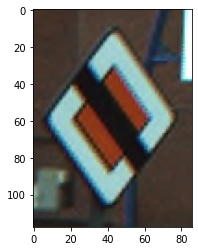

/content/drive/MyDrive/Traffic_sign_recognition/Training/00055/00276_00001.ppm


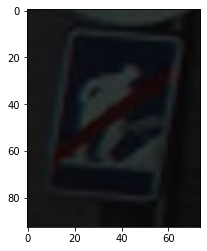

/content/drive/MyDrive/Traffic_sign_recognition/Training/00057/00790_00001.ppm


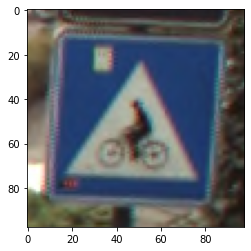

/content/drive/MyDrive/Traffic_sign_recognition/Training/00054/00135_00000.ppm


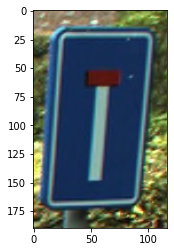

/content/drive/MyDrive/Traffic_sign_recognition/Training/00061/00037_00001.ppm


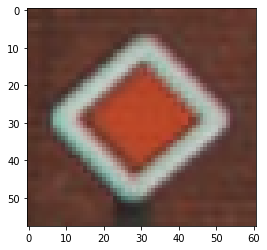

/content/drive/MyDrive/Traffic_sign_recognition/Training/00056/00784_00002.ppm


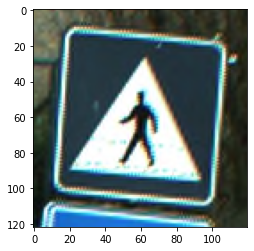

/content/drive/MyDrive/Traffic_sign_recognition/Training/00052/00729_00000.ppm


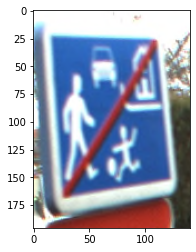

/content/drive/MyDrive/Traffic_sign_recognition/Training/00053/01167_00000.ppm


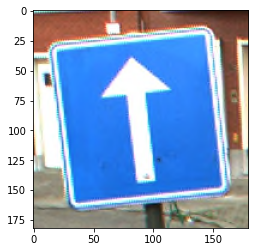

/content/drive/MyDrive/Traffic_sign_recognition/Training/00058/00775_00002.ppm


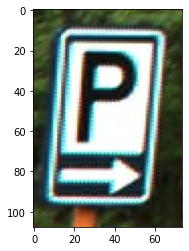

/content/drive/MyDrive/Traffic_sign_recognition/Training/00059/00182_00002.ppm


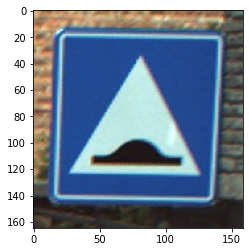

/content/drive/MyDrive/Traffic_sign_recognition/Training/00048/00108_00000.ppm


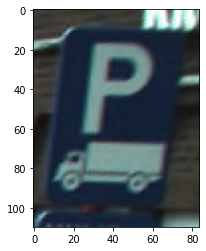

/content/drive/MyDrive/Traffic_sign_recognition/Training/00045/00035_00001.ppm


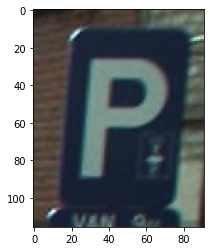

/content/drive/MyDrive/Traffic_sign_recognition/Training/00043/01733_00002.ppm


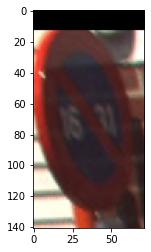

/content/drive/MyDrive/Traffic_sign_recognition/Training/00050/00824_00000.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00049/00258_00000.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00046/00106_00000.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00044/00289_00002.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00047/00495_00002.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00042/01095_00000.ppm


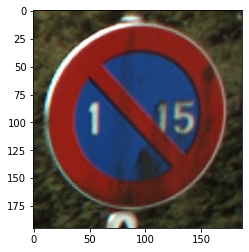

/content/drive/MyDrive/Traffic_sign_recognition/Training/00051/01127_00002.ppm


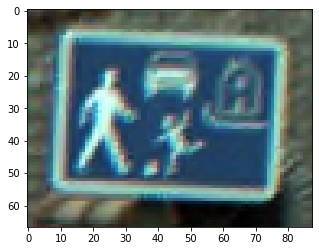

/content/drive/MyDrive/Traffic_sign_recognition/Training/00038/00393_00002.ppm


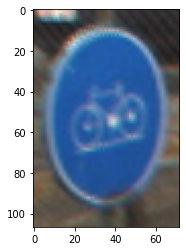

/content/drive/MyDrive/Traffic_sign_recognition/Training/00039/00291_00000.ppm


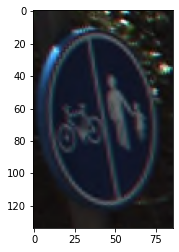

/content/drive/MyDrive/Traffic_sign_recognition/Training/00041/00986_00000.ppm


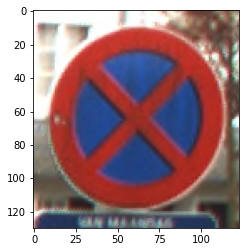

/content/drive/MyDrive/Traffic_sign_recognition/Training/00035/00592_00002.ppm


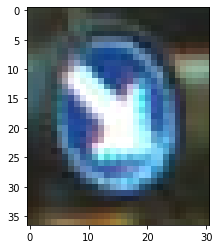

/content/drive/MyDrive/Traffic_sign_recognition/Training/00037/00807_00001.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00033/00343_00002.ppm


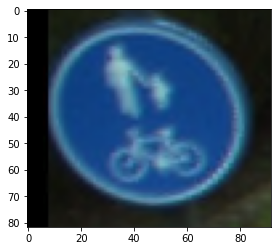

/content/drive/MyDrive/Traffic_sign_recognition/Training/00036/01606_00002.ppm


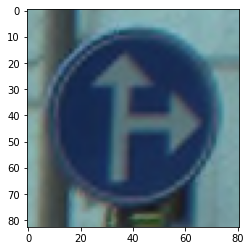

/content/drive/MyDrive/Traffic_sign_recognition/Training/00032/01774_00000.ppm


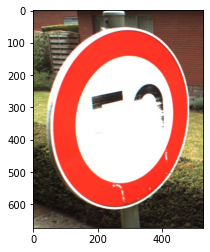

/content/drive/MyDrive/Traffic_sign_recognition/Training/00040/00744_00002.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00034/01240_00000.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00022/00020_00001.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00026/00246_00001.ppm


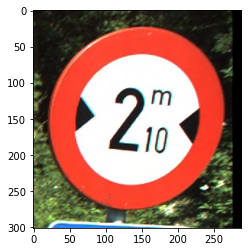

/content/drive/MyDrive/Traffic_sign_recognition/Training/00031/00068_00001.ppm


/content/drive/MyDrive/Traffic_sign_recognition/Training/00025/01166_00001.ppm


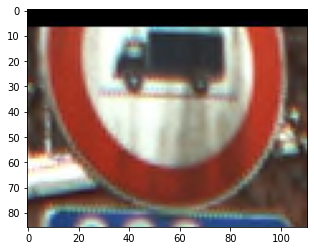

/content/drive/MyDrive/Traffic_sign_recognition/Training/00027/01490_00000.ppm


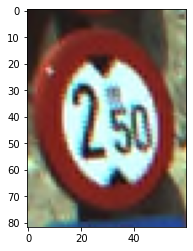

/content/drive/MyDrive/Traffic_sign_recognition/Training/00023/00630_00000.ppm


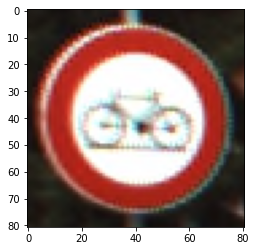

/content/drive/MyDrive/Traffic_sign_recognition/Training/00030/00710_00002.ppm


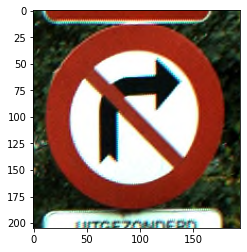

/content/drive/MyDrive/Traffic_sign_recognition/Training/00028/00200_00001.ppm


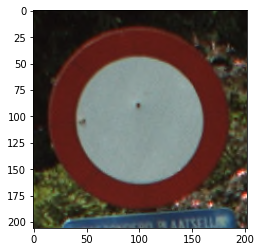

/content/drive/MyDrive/Traffic_sign_recognition/Training/00024/01257_00001.ppm


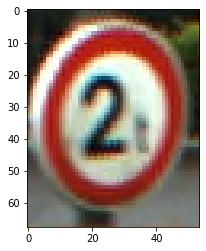

/content/drive/MyDrive/Traffic_sign_recognition/Training/00029/00376_00001.ppm


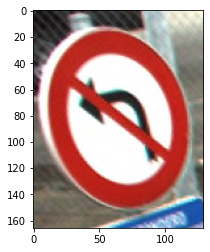

/content/drive/MyDrive/Traffic_sign_recognition/Training/00017/00002_00001.ppm


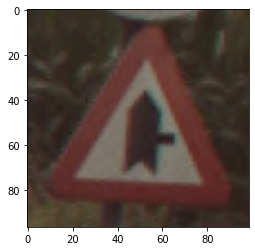

/content/drive/MyDrive/Traffic_sign_recognition/Training/00018/00008_00001.ppm


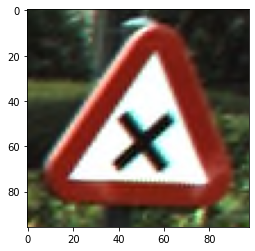

/content/drive/MyDrive/Traffic_sign_recognition/Training/00015/00331_00001.ppm


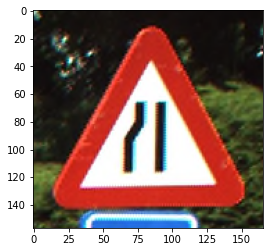

/content/drive/MyDrive/Traffic_sign_recognition/Training/00013/00138_00000.ppm


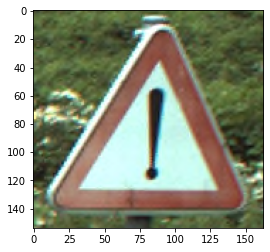

/content/drive/MyDrive/Traffic_sign_recognition/Training/00016/00230_00000.ppm


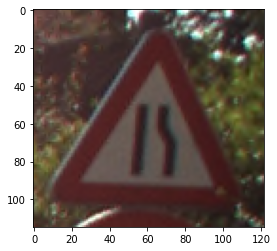

/content/drive/MyDrive/Traffic_sign_recognition/Training/00019/00006_00000.ppm


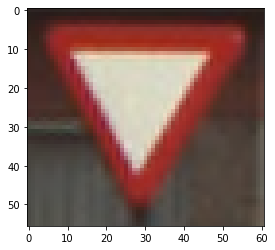

/content/drive/MyDrive/Traffic_sign_recognition/Training/00014/00208_00002.ppm


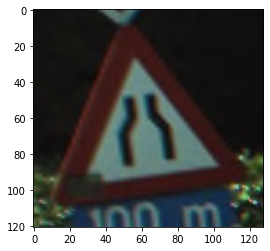

/content/drive/MyDrive/Traffic_sign_recognition/Training/00021/00375_00001.ppm


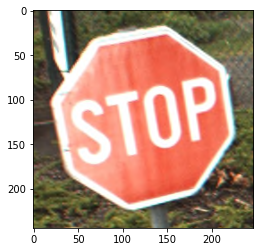

/content/drive/MyDrive/Traffic_sign_recognition/Training/00020/00231_00001.ppm


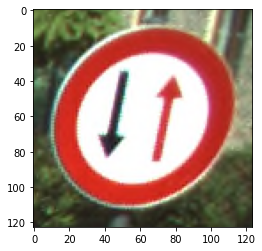

/content/drive/MyDrive/Traffic_sign_recognition/Training/00012/01473_00000.ppm


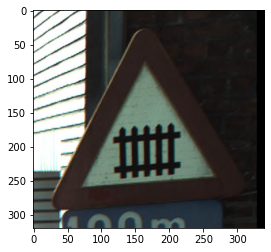

/content/drive/MyDrive/Traffic_sign_recognition/Training/00010/00240_00000.ppm


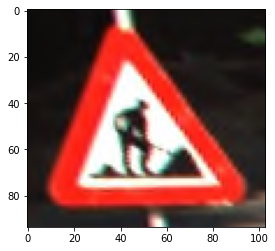

/content/drive/MyDrive/Traffic_sign_recognition/Training/00006/00147_00001.ppm


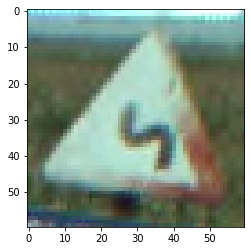

/content/drive/MyDrive/Traffic_sign_recognition/Training/00004/00145_00002.ppm


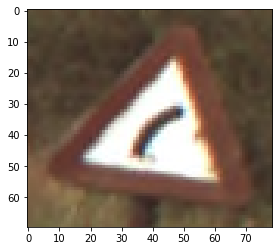

/content/drive/MyDrive/Traffic_sign_recognition/Training/00005/00261_00000.ppm


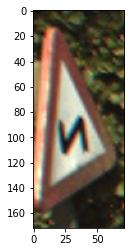

/content/drive/MyDrive/Traffic_sign_recognition/Training/00008/00046_00001.ppm


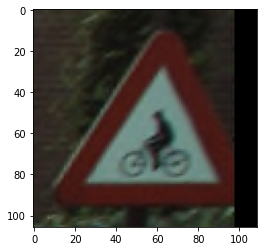

/content/drive/MyDrive/Traffic_sign_recognition/Training/00003/00207_00001.ppm


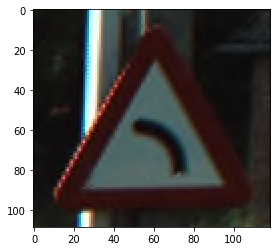

/content/drive/MyDrive/Traffic_sign_recognition/Training/00007/00014_00002.ppm


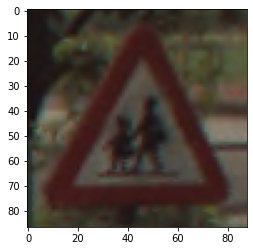

/content/drive/MyDrive/Traffic_sign_recognition/Training/00002/00270_00001.ppm


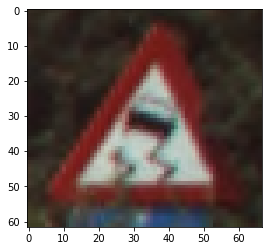

/content/drive/MyDrive/Traffic_sign_recognition/Training/00011/00271_00000.ppm


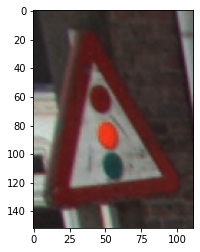

/content/drive/MyDrive/Traffic_sign_recognition/Training/00009/00141_00001.ppm


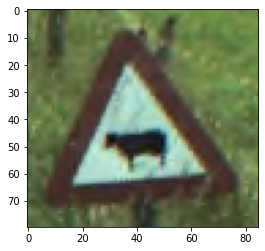

/content/drive/MyDrive/Traffic_sign_recognition/Training/00001/00025_00000.ppm


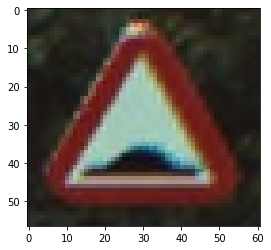

/content/drive/MyDrive/Traffic_sign_recognition/Training/00000/01153_00002.ppm


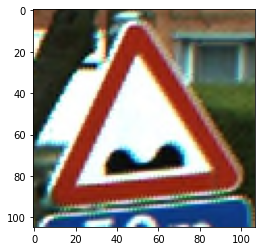

In [ ]:
for dir in os.listdir(train_data_dir):
  img_dir = os.path.join(train_data_dir, dir)
  for first in os.listdir(img_dir):
    if first.endswith(".ppm"):
      img = os.path.join(img_dir, first)
      print(img)
      plt.imshow(imread(img))
      plt.show()
      break

### Handling images of different sizes

Ideally neural networks expect a fixed-size input. But these images are not all the same size. A common approach is to crop and pad the images to a selected apect ratio, but then we have to make sure that we don't cut-off parts of the traffic signs in the process. That seems like it might require manual work! 

We'll just resize the images to a fixed size and ignore the distortions caused by the different aspect ratios. A person can easily recognize a traffic sign even if it's compressed or stretched a bit, so we hope that our model can as well.

And while we're at it, let's make the images smaller. The larger the input data, the larger the model, and the slower it is to train. In the early stages of development we want fast training to avoid long waits between iterations while we change the code rapidly.

In [7]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.4, horizontal_flip=True, rescale=1/255,)

In [8]:
test_data_gen = ImageDataGenerator(rescale=1/255)

In [9]:
image_shape = (224, 224, 3)

In [10]:
training_set = train_data_gen.flow_from_directory(train_data_dir, target_size=image_shape[:2], class_mode='categorical', batch_size=32)
testing_set = test_data_gen.flow_from_directory(test_data_dir, target_size=image_shape[:2], class_mode='categorical', batch_size=32, shuffle=False)

Found 4575 images belonging to 62 classes.
Found 2520 images belonging to 62 classes.


In [11]:
training_set.class_indices

{'00000': 0,
 '00001': 1,
 '00002': 2,
 '00003': 3,
 '00004': 4,
 '00005': 5,
 '00006': 6,
 '00007': 7,
 '00008': 8,
 '00009': 9,
 '00010': 10,
 '00011': 11,
 '00012': 12,
 '00013': 13,
 '00014': 14,
 '00015': 15,
 '00016': 16,
 '00017': 17,
 '00018': 18,
 '00019': 19,
 '00020': 20,
 '00021': 21,
 '00022': 22,
 '00023': 23,
 '00024': 24,
 '00025': 25,
 '00026': 26,
 '00027': 27,
 '00028': 28,
 '00029': 29,
 '00030': 30,
 '00031': 31,
 '00032': 32,
 '00033': 33,
 '00034': 34,
 '00035': 35,
 '00036': 36,
 '00037': 37,
 '00038': 38,
 '00039': 39,
 '00040': 40,
 '00041': 41,
 '00042': 42,
 '00043': 43,
 '00044': 44,
 '00045': 45,
 '00046': 46,
 '00047': 47,
 '00048': 48,
 '00049': 49,
 '00050': 50,
 '00051': 51,
 '00052': 52,
 '00053': 53,
 '00054': 54,
 '00055': 55,
 '00056': 56,
 '00057': 57,
 '00058': 58,
 '00059': 59,
 '00060': 60,
 '00061': 61}

In [ ]:
testing_set.class_indices

{'00000': 0,
 '00001': 1,
 '00002': 2,
 '00003': 3,
 '00004': 4,
 '00005': 5,
 '00006': 6,
 '00007': 7,
 '00008': 8,
 '00009': 9,
 '00010': 10,
 '00011': 11,
 '00012': 12,
 '00013': 13,
 '00014': 14,
 '00015': 15,
 '00016': 16,
 '00017': 17,
 '00018': 18,
 '00019': 19,
 '00020': 20,
 '00021': 21,
 '00022': 22,
 '00023': 23,
 '00024': 24,
 '00025': 25,
 '00026': 26,
 '00027': 27,
 '00028': 28,
 '00029': 29,
 '00030': 30,
 '00031': 31,
 '00032': 32,
 '00033': 33,
 '00034': 34,
 '00035': 35,
 '00036': 36,
 '00037': 37,
 '00038': 38,
 '00039': 39,
 '00040': 40,
 '00041': 41,
 '00042': 42,
 '00043': 43,
 '00044': 44,
 '00045': 45,
 '00046': 46,
 '00047': 47,
 '00048': 48,
 '00049': 49,
 '00050': 50,
 '00051': 51,
 '00052': 52,
 '00053': 53,
 '00054': 54,
 '00055': 55,
 '00056': 56,
 '00057': 57,
 '00058': 58,
 '00059': 59,
 '00060': 60,
 '00061': 61}

In [ ]:
training_set

### Create a Model

In [ ]:
# your code here. One could design from scratch or use some standard ConvNets provided in Keras and train it from scratch

### Training

<h2> AlexNet

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 96, kernel_size=(11,11), strides = (4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(62, activation="softmax")
])


In [ ]:
early_stop = [EarlyStopping(monitor='val_loss', patience=5, verbose=2), ModelCheckpoint('save_at_{epoch}.h5')]

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
model.fit(training_set, batch_size=32, epochs=100, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/100
143/143 [==============================] - 65s 443ms/step - loss: 6.9114 - accuracy: 0.1631 - recall: 0.0885 - val_loss: 3.1397 - val_accuracy: 0.2397 - val_recall: 0.0667
Epoch 2/100
143/143 [==============================] - 62s 436ms/step - loss: 3.0555 - accuracy: 0.2640 - recall: 0.1495 - val_loss: 2.6885 - val_accuracy: 0.3702 - val_recall: 0.0897
Epoch 3/100
143/143 [==============================] - 62s 430ms/step - loss: 2.8183 - accuracy: 0.2988 - recall: 0.1746 - val_loss: 2.1531 - val_accuracy: 0.4452 - val_recall: 0.1567
Epoch 4/100
143/143 [==============================] - 62s 430ms/step - loss: 2.6956 - accuracy: 0.3222 - recall: 0.2057 - val_loss: 2.1998 - val_accuracy: 0.3635 - val_recall: 0.1472
Epoch 5/100
143/143 [==============================] - 62s 437ms/step - loss: 2.5159 - accuracy: 0.3674 - recall: 0.2490 - val_loss: 2.1882 - val_accuracy: 0.4310 - val_recall: 0.1575
Epoch 6/100
143/143 [==============================] - 61s 429ms/step - loss: 2.

In [ ]:
losses = pd.DataFrame(model.history.history)

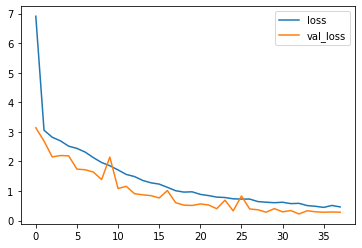

In [ ]:
losses[['loss', 'val_loss']].plot()

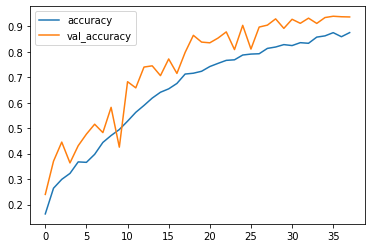

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(testing_set)

79/79 [==============================] - 7s 90ms/step - loss: 0.2817 - accuracy: 0.9369 - recall: 0.9183


[0.2817199230194092, 0.936904788017273, 0.9182539582252502]

In [ ]:
model.save('vgg_classifier.h5')

In [ ]:
pred = model.predict(testing_set)

79/79 [==============================] - 6s 74ms/step


In [ ]:
preds = np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(testing_set.classes, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        27
           2       0.70      1.00      0.82         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         6
           7       0.97      0.98      0.97        90
           8       0.40      1.00      0.57        12
          10       0.96      0.93      0.95        28
          11       0.00      0.00      0.00         0
          12       0.75      1.00      0.86         3
          13       1.00      0.62      0.76        39
          14       0.65      1.00      0.79        15
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        12
          17       0.98      1.00      0.99       183
          18       0.97    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

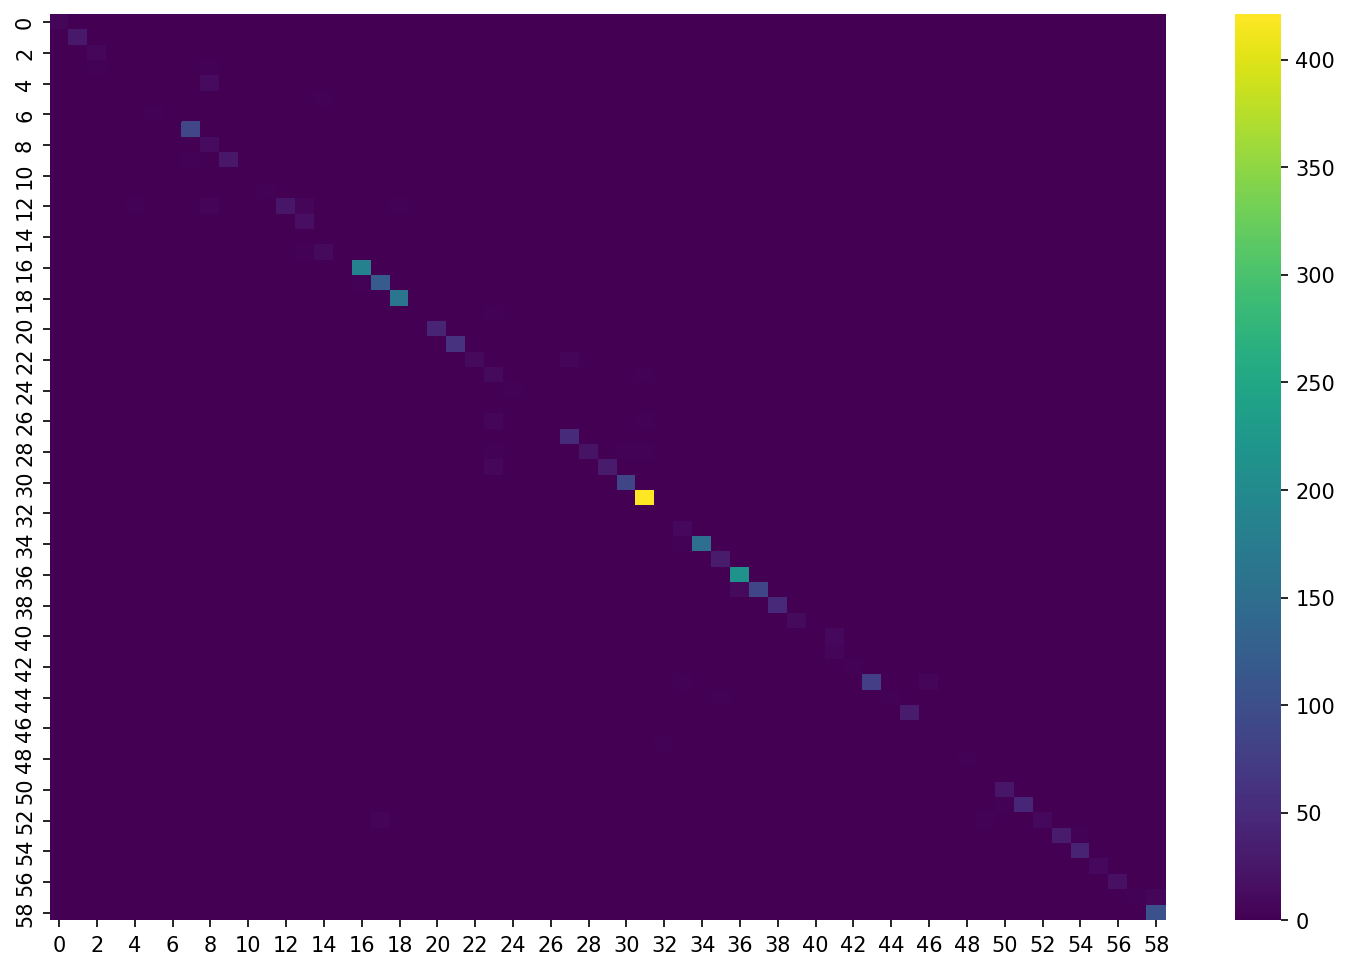

In [ ]:
plt.figure(figsize=(12, 8), dpi=150)
sns.heatmap(confusion_matrix(testing_set.classes, preds), cmap='viridis')

In [ ]:
confusion_matrix(testing_set.classes, preds)

array([[  6,   0,   0, ...,   0,   0,   0],
       [  0,  27,   0, ...,   0,   0,   0],
       [  0,   0,   7, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  17,   0,   0],
       [  0,   0,   0, ...,   0,   3,   5],
       [  0,   0,   0, ...,   0,   0, 105]])

<h2> VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = tf.keras.Sequential()

for layer in vgg.layers:
    model.add(layer)

# only do this when you are using pre trained weights.
for layer in model.layers:
    layer.trainable=False

# adding fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(62, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
early_stop = [EarlyStopping(monitor='val_loss', patience=10, verbose=2)]

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
model.fit(training_set, batch_size=32, epochs=100, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/100
143/143 [==============================] - 94s 583ms/step - loss: 3.1343 - accuracy: 0.2627 - recall: 0.0848 - val_loss: 1.9689 - val_accuracy: 0.4770 - val_recall: 0.2556
Epoch 2/100
143/143 [==============================] - 78s 542ms/step - loss: 2.1055 - accuracy: 0.4339 - recall: 0.2426 - val_loss: 1.4240 - val_accuracy: 0.5647 - val_recall: 0.4306
Epoch 3/100
143/143 [==============================] - 80s 558ms/step - loss: 1.7663 - accuracy: 0.5038 - recall: 0.3320 - val_loss: 1.2691 - val_accuracy: 0.6258 - val_recall: 0.4988
Epoch 4/100
143/143 [==============================] - 77s 539ms/step - loss: 1.5592 - accuracy: 0.5484 - recall: 0.3910 - val_loss: 1.2534 - val_accuracy: 0.6111 - val_recall: 0.5131
Epoch 5/100
143/143 [==============================] - 77s 537ms/step - loss: 1.4451 - accuracy: 0.5736 - recall: 0.4400 - val_loss: 1.1223 - val_accuracy: 0.6508 - val_recall: 0.5571
Epoch 6/100
143/143 [==============================] - 77s 535ms/step - loss: 1.

In [ ]:
losses = pd.DataFrame(model.history.history)

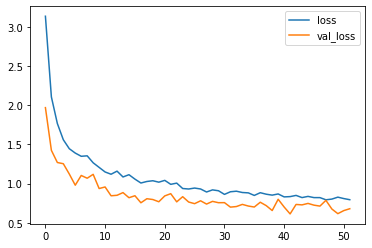

In [ ]:
losses[['loss', 'val_loss']].plot()

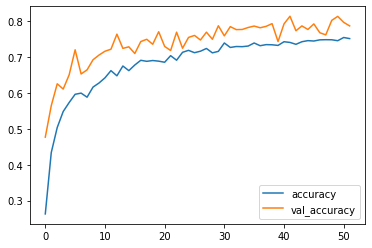

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.save('vgg19_classifier.h5')

In [ ]:
pred = model.predict(testing_set)

79/79 [==============================] - 14s 175ms/step


In [ ]:
preds = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(testing_set.classes, preds))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.46      0.96      0.63        27
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         3
           6       0.50      0.33      0.40         6
           7       0.38      0.94      0.54        90
           8       0.25      0.17      0.20        12
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00        28
          12       1.00      1.00      1.00         3
          13       0.92      0.90      0.91        39
          14       0.67      0.93      0.78        15
          16       0.67      0.17      0.27        12
          17       0.88      0.56      0.69       183
          18       0.91      0.71      0.80       122
          19       0.99    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

<h2>vgg16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
vgg.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model = tf.keras.Sequential()

for layer in vgg.layers:
    model.add(layer)

# only do this when you are using pre trained weights.
for layer in model.layers:
    layer.trainable=False

# adding fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(62, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
model.fit(training_set, batch_size=32, epochs=100, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/100
143/143 [==============================] - 76s 525ms/step - loss: 2.6425 - accuracy: 0.3576 - recall: 0.1729 - val_loss: 1.6554 - val_accuracy: 0.5790 - val_recall: 0.4095
Epoch 2/100
143/143 [==============================] - 73s 509ms/step - loss: 1.6543 - accuracy: 0.5556 - recall: 0.3926 - val_loss: 1.1893 - val_accuracy: 0.6897 - val_recall: 0.4825
Epoch 3/100
143/143 [==============================] - 76s 530ms/step - loss: 1.3340 - accuracy: 0.6280 - recall: 0.4868 - val_loss: 1.0344 - val_accuracy: 0.6893 - val_recall: 0.6079
Epoch 4/100
143/143 [==============================] - 73s 511ms/step - loss: 1.1735 - accuracy: 0.6564 - recall: 0.5499 - val_loss: 0.9753 - val_accuracy: 0.7262 - val_recall: 0.5984
Epoch 5/100
143/143 [==============================] - 73s 508ms/step - loss: 1.0994 - accuracy: 0.6811 - recall: 0.5801 - val_loss: 0.9975 - val_accuracy: 0.7040 - val_recall: 0.6044
Epoch 6/100
143/143 [==============================] - 72s 506ms/step - loss: 1.

In [ ]:
model.save('vgg16_classifier.h5')

In [ ]:
pred = model.predict(testing_set)

79/79 [==============================] - 12s 153ms/step


In [ ]:
preds = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(testing_set.classes, preds))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.70      0.96      0.81        27
           2       0.00      0.00      0.00         7
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         3
           6       0.50      0.50      0.50         6
           7       0.79      0.86      0.82        90
           8       0.56      0.75      0.64        12
          10       1.00      0.61      0.76        28
          12       1.00      1.00      1.00         3
          13       0.89      0.87      0.88        39
          14       0.56      0.60      0.58        15
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00        12
          17       0.83      0.97      0.89       183
          18       0.95      0.88      0.91       122
          19       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

<h2> Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(include_top=True, weights=None, classes=62)
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_376 (Conv2D)            (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_376 (Batch  (None, 149, 149, 32  96         ['conv2d_376[0][0]']             
 Normalization)                 )                                                      

In [14]:
early_stop = [EarlyStopping(monitor='val_loss', patience=5, verbose=2)]

In [ ]:
inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [ ]:
inception.fit(training_set, batch_size=32, epochs=100, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/100
143/143 [==============================] - 143s 909ms/step - loss: 2.8816 - accuracy: 0.2765 - recall: 0.1123 - val_loss: 6.5488 - val_accuracy: 0.1000 - val_recall: 0.0397
Epoch 2/100
143/143 [==============================] - 121s 841ms/step - loss: 2.0613 - accuracy: 0.4055 - recall: 0.2468 - val_loss: 7.6911 - val_accuracy: 0.1131 - val_recall: 0.1032
Epoch 3/100
143/143 [==============================] - 123s 858ms/step - loss: 1.7712 - accuracy: 0.4896 - recall: 0.3141 - val_loss: 4.3087 - val_accuracy: 0.3698 - val_recall: 0.3472
Epoch 4/100
143/143 [==============================] - 120s 837ms/step - loss: 1.3616 - accuracy: 0.5928 - recall: 0.4452 - val_loss: 3.0214 - val_accuracy: 0.4254 - val_recall: 0.4036
Epoch 5/100
143/143 [==============================] - 120s 840ms/step - loss: 1.1117 - accuracy: 0.6693 - recall: 0.5596 - val_loss: 1.6477 - val_accuracy: 0.5615 - val_recall: 0.5063
Epoch 6/100
143/143 [==============================] - 135s 945ms/step - lo

In [ ]:
losses = pd.DataFrame(inception.history.history)

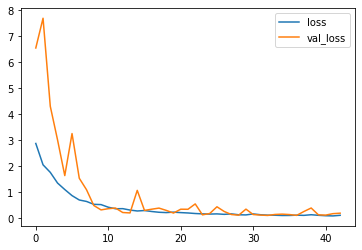

In [ ]:
losses[['loss', 'val_loss']].plot()

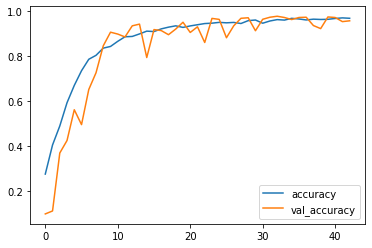

In [ ]:
losses[['accuracy', 'val_accuracy']].plot()

In [ ]:
inception.save('inception_classifier.h5')

In [ ]:
pred = inception.predict(testing_set)

79/79 [==============================] - 11s 122ms/step


In [ ]:
preds = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(testing_set.classes, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.93      0.96        27
           2       1.00      1.00      1.00         7
           3       0.33      0.17      0.22         6
           4       0.67      0.83      0.74        12
           5       0.50      1.00      0.67         3
           6       1.00      0.50      0.67         6
           7       0.97      1.00      0.98        90
           8       0.86      1.00      0.92        12
          10       1.00      0.43      0.60        28
          11       0.00      0.00      0.00         0
          12       1.00      1.00      1.00         3
          13       1.00      0.87      0.93        39
          14       1.00      1.00      1.00        15
          16       1.00      1.00      1.00        12
          17       0.95      1.00      0.97       183
          18       1.00      0.95      0.97       122
          19       0.96    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2> Custom model

In [12]:
model = Sequential()
#Convolution layers
model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

#Dense layers
model.add(Dense(256, activation='relu',))
model.add(Dropout(0.3))

#output layer
model.add(Dense(62, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall'])

In [15]:
model.fit(training_set, batch_size=32, epochs=100, callbacks=[early_stop], validation_data=testing_set, validation_batch_size=32)

Epoch 1/100
143/143 [==============================] - 95s 636ms/step - loss: 3.1508 - accuracy: 0.2210 - recall: 0.0595 - val_loss: 2.3543 - val_accuracy: 0.3964 - val_recall: 0.0877
Epoch 2/100
143/143 [==============================] - 86s 600ms/step - loss: 2.4340 - accuracy: 0.3259 - recall: 0.1447 - val_loss: 2.0323 - val_accuracy: 0.4242 - val_recall: 0.2647
Epoch 3/100
143/143 [==============================] - 87s 605ms/step - loss: 2.2355 - accuracy: 0.3733 - recall: 0.1816 - val_loss: 1.9227 - val_accuracy: 0.4536 - val_recall: 0.1655
Epoch 4/100
143/143 [==============================] - 86s 598ms/step - loss: 2.1026 - accuracy: 0.4028 - recall: 0.1952 - val_loss: 1.8229 - val_accuracy: 0.4702 - val_recall: 0.2306
Epoch 5/100
143/143 [==============================] - 87s 607ms/step - loss: 2.0370 - accuracy: 0.4157 - recall: 0.2162 - val_loss: 1.6746 - val_accuracy: 0.5024 - val_recall: 0.2361
Epoch 6/100
143/143 [==============================] - 86s 603ms/step - loss: 1.

In [16]:
model.evaluate(testing_set)

79/79 [==============================] - 13s 157ms/step - loss: 0.8134 - accuracy: 0.7591 - recall: 0.7103


[0.8134049773216248, 0.7591269612312317, 0.7103174328804016]

Model Performance
*   AlexNet- Training Accuracy:0.87 Testing Accuracy:0.93
*   VGG19- Training Accuracy:0.75 Testing Accuracy:0.78
*   VGG16- Training Accuracy:0.85 Testing Accuracy:0.87
*   Inception V3- Training Accuracy:0.96 Testing Accuracy:0.95
*   Custom Model-Training Accuracy:0.75 Testing Accuracy:0.75








